# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [6]:
df = pd.read_csv('/home/aheggie/mdst/MDST-Onboarding-main/data/states_edu.csv')
print(df.head())
df.shape

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

(1715, 25)

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math


How many years of data are logged in our dataset? 

In [20]:
# @@@ 1
# Your Code
logged_years = df['YEAR'].nunique()
print(f"There are {logged_years} years of data in the dataset.")

There are 33 years of data in the dataset.


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [22]:
# @@@ 2
mi_oh_data = df[df['STATE'].isin(['MICHIGAN', 'OHIO'])]
average_scores = mi_oh_data.groupby('STATE')['AVG_MATH_4_SCORE'].mean()
print(average_scores)
higher_state = average_scores.idxmax()
print(f"{higher_state} has the higher average for Grade 4 Math.")

STATE
MICHIGAN    234.363636
OHIO        239.454545
Name: AVG_MATH_4_SCORE, dtype: float64
OHIO has the higher average for Grade 4 Math.


Find the average for your chosen test across all states in 2019

In [24]:
# @@@ 3
data_2019 = df[df['YEAR'] == 2019]
avg_scores_2019 = data_2019['AVG_MATH_4_SCORE'].mean()
print(f"The average Grade 4 Math score across all states in 2019 is {avg_scores_2019:.2f}.")


The average Grade 4 Math score across all states in 2019 is 239.94.


For each state, find a maximum value for your chosen test score

In [25]:
# @@@ 4
max_scores_by_state = df.groupby('STATE')['AVG_MATH_4_SCORE'].max()
print(max_scores_by_state)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [26]:
# @@@ 5

# Trying to see the expenditure per student
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

# Also Creating a new feature: revenue per student, do see if they correlate
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']

# Fill NaN values for these new features with 0
df['EXPENDITURE_PER_STUDENT'].fillna(0, inplace=True)
df['REVENUE_PER_STUDENT'].fillna(0, inplace=True)

# Standardize the YEAR column for potential use as a feature
# Normalize it to range between 0 and 1
df['YEAR_STANDARDIZED'] = (df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

# Preview the modified DataFrame to check the new features
print(df[['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT', 'YEAR_STANDARDIZED']].head())



   EXPENDITURE_PER_STUDENT  REVENUE_PER_STUDENT  YEAR_STANDARDIZED
0                      0.0                  0.0           0.181818
1                      0.0                  0.0           0.181818
2                      0.0                  0.0           0.181818
3                      0.0                  0.0           0.181818
4                      0.0                  0.0           0.181818


/tmp/ipykernel_13127/535723048.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['EXPENDITURE_PER_STUDENT'].fillna(0, inplace=True)
/tmp/ipykernel_13127/535723048.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

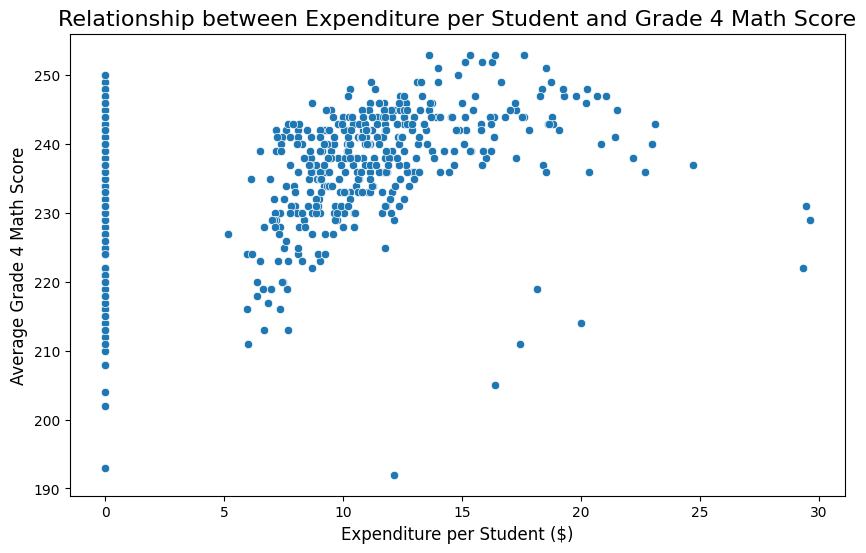

In [29]:
# @@@ 6
import seaborn as sns

# Scatter plot for expenditure per student vs. AVG_MATH_4_SCORE
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_4_SCORE')
plt.title('Relationship between Expenditure per Student and Grade 4 Math Score', fontsize=16)
plt.xlabel('Expenditure per Student ($)', fontsize=12)
plt.ylabel('Average Grade 4 Math Score', fontsize=12)
plt.show()

**<CAPTION FOR VIZ 1>**

**Visualization 2**

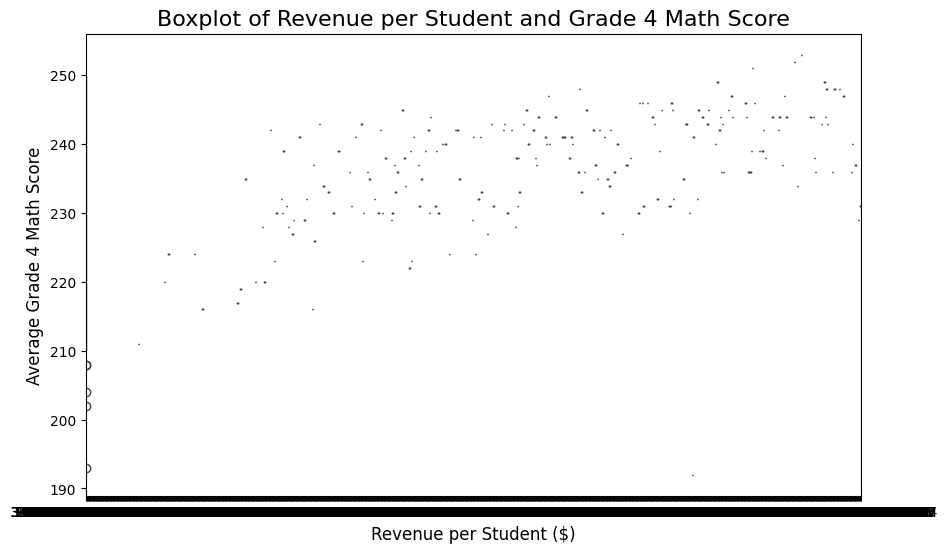

In [28]:
# @@@ 7
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='REVENUE_PER_STUDENT', y='AVG_MATH_4_SCORE')
plt.title('Boxplot of Revenue per Student and Grade 4 Math Score', fontsize=16)
plt.xlabel('Revenue per Student ($)', fontsize=12)
plt.ylabel('Average Grade 4 Math Score', fontsize=12)
plt.show()

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# @@@ 8
y = df['AVG_MATH_4_SCORE']
X = df[['EXPENDITURE_PER_STUDENT', 'REVENUE_PER_STUDENT', 'TOTAL_REVENUE', 'TOTAL_EXPENDITURE']]
#fill in missing values if there is any
X = X.fillna(X.median())
y = y.fillna(y.median())


In [33]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training Data Size:", X_train.shape)
print("Testing Data Size:", X_test.shape)


Training Data Size: (1372, 4)
Testing Data Size: (343, 4)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [35]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [36]:
# @@@ 11
# create your model here
model = LinearRegression() 

In [37]:
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [41]:
# @@@ 12
print(model.intercept_)
print(model.coef_)


model.score(X_test, y_test)

np.mean(model.predict(X_test)-y_test)

np.mean(np.abs(model.predict(X_test)-y_test))

np.mean((model.predict(X_test)-y_test)**2)**0.5

236.26038566261732
[ 3.62374359e-01 -2.15112540e-01  2.58936695e-07 -2.48369434e-07]


np.float64(4.674089325498338)

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

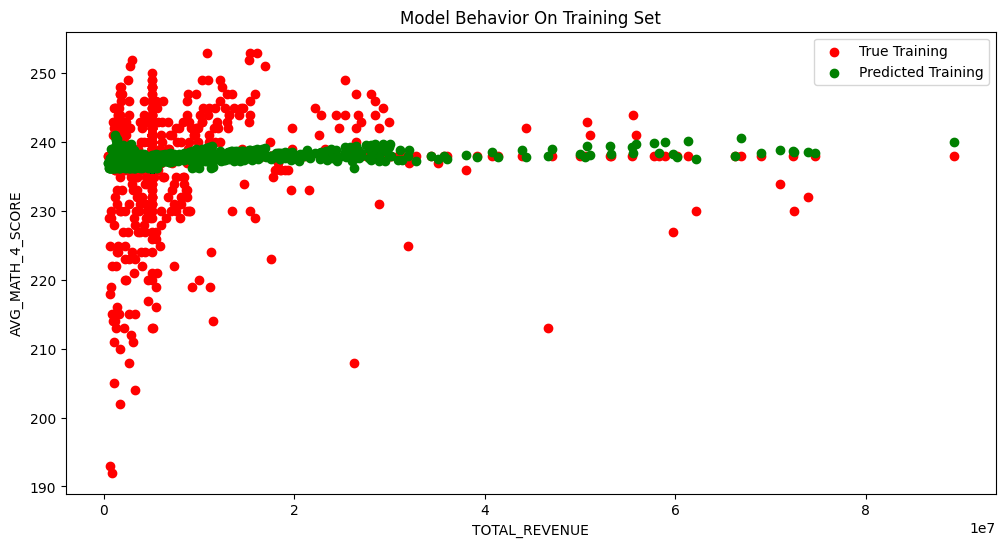

In [42]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'
col_name = 'TOTAL_REVENUE'

f = plt.figure(figsize=(12,6))

plt.scatter(X_train[col_name], y_train, color="red")

plt.scatter(X_train[col_name], model.predict(X_train), color="green")

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)  # This shows the predictor's name
plt.ylabel('AVG_MATH_4_SCORE')  # Change this to your target variable's name
plt.title("Model Behavior On Training Set")
plt.show()


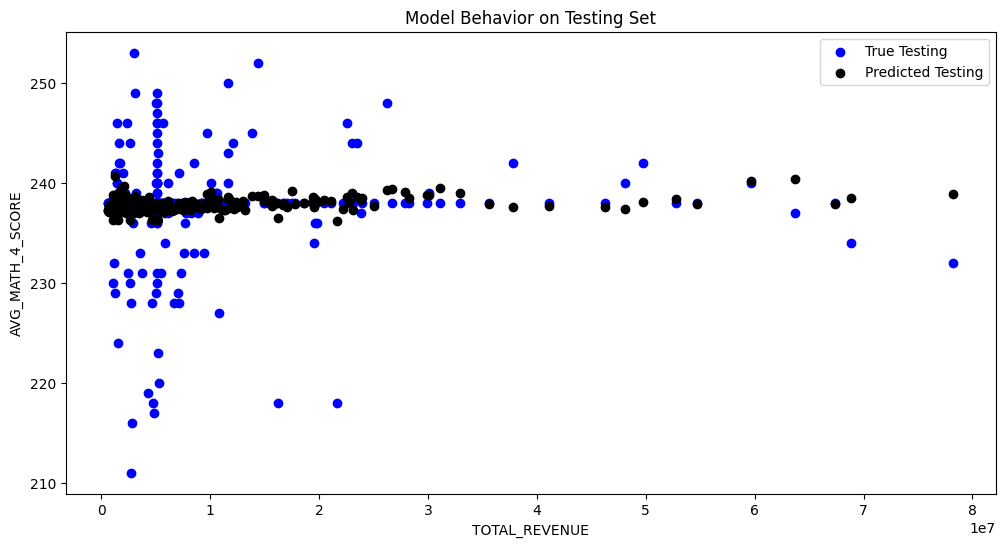

In [43]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"
col_name = 'TOTAL_REVENUE'

f = plt.figure(figsize=(12,6))

plt.scatter(X_test[col_name], y_test, color="blue")

plt.scatter(X_test[col_name], model.predict(X_test), color="black")

plt.legend(['True Testing', 'Predicted Testing'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_4_SCORE')  
plt.title("Model Behavior on Testing Set")
plt.show()
